# Kinetiq: Temporal Action Recognition in Motion 🎬

> *By Ali Sarabandi*  
> *MSc Student @ University of Bicocca - Milano*

<p align="center">
  <img src="https://www.disat.unimib.it/sites/st12/files/mmffcmyk.png" alt="Bird Classifier" width="200">
</p>

---

## Project Overview

This project focuses on preparing and exploring the **HMDB51** dataset in the context of human action recognition. It includes data extraction, tidy a bit, restructuring, and exploratory data analysis (EDA). The aim is to lay a solid foundation before moving on to model development and experimentation.

---

## Dataset Overview: HMDB51

The **HMDB51** dataset is a benchmark for video-based human action classification. It consists of short `.avi` video clips covering a wide range of physical and social actions.

|  Category |  Details |
|------------|------------|
|  Total Videos | 6,766 clips  |
|  Number of Classes | 51 unique human actions |
|  Average Duration | ~3.15 seconds per video |
|  Folder Structure | `class_name/class_name/video.avi` |
|  Split Scheme | Based on official split-1: train/test, with 10% of train held out as validation |

Each class represents a human activity such as `run`, `laugh`, `jump`, `draw_sword`, etc. The dataset is not perfectly balanced, but the distribution is relatively stable — most classes contain between 100 and 150 clips.

---

##  This Repository

This part of the project covers:

- Extracting `.rar` archives and restructuring nested folders
- Mapping class names to labels
- Parsing official split files
- Analysing video count and duration statistics per class
- Visualising distribution of clip lengths

> No modelling or training takes place here. This repo is purely for **data preparation** and **EDA**.

---

## Next Steps: Frames extraction

Once the dataset is fully cleaned and prepped, I will be developing and comparing three distinct deep learning models:

1. **3D CNN** – A standard convolutional model extended to three dimensions.
2. **3D CNN (IMPROVED)** – Since the first model is kinda blind shot, it helps me to understand more about the model behaving that in this model I try to fill the holes. 
3. **ResNet-50** – A pre-trained model, which I fined tuned (Transform Learning) on my dataset, for sake of comparison with my own models.

Each model will be evaluated on the same data splits (split-1) to ensure a fair and consistent comparison.


In [ ]:
from google.colab import drive
import os
import zipfile
import shutil


# mount Google Drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###  HMDB51 Dataset Extraction Workflow Explained

Setting up the **HMDB51 human action recognition dataset**. Below is a breakdown of each step:

---

#### 1. Setting Up the Data Directory
Defining a root directory inside **Google Drive** to keep all HMDB51-related files organised:
- `/content/drive/MyDrive/HMDB51`

---

#### 2. Extracting `.rar` Files
Working with two main RAR archives:
- `hmdb51_org.rar` – Contains all video files for 51 action categories 
- `test_train_splits.rar` – Contains official train/test split information 

Both archives are extracted to:
- `/content/drive/MyDrive/HMDB51/HMDB51_extracted`
- Train/test splits go into: `/content/drive/MyDrive/HMDB51/HMDB51_extracted/splits`

---

#### 3. Creating a Directory for Videos
Creating a `videos` directory inside the extraction folder:
- `/content/drive/MyDrive/HMDB51/HMDB51_extracted/videos`

This is the target location for all unzipped class folders.

---

#### 4. Unzipping Class-wise Archives
Each `.zip` file inside the extraction directory corresponds to one action class (e.g., `clap`, `run`, `jump`).

Looping through all `.zip` files and extracting them into the `videos/` directory, effectively separating videos by class.

---

#### Result
Now contains **51 subfolders**, each representing a unique action class and filled with corresponding video clips.  
The take here is the data is so nested that after the extraction I found out each clasess are also zipped and it is heavily nested so the next steps I will extract them the I will flatten them.


In [ ]:
# path to my shared folder
data_root = "/content/drive/MyDrive/HMDB51"
os.makedirs(data_root, exist_ok=True)


rar_videos = os.path.join(data_root, "hmdb51_org.rar")
rar_splits = os.path.join(data_root, "test_train_splits.rar")
extract_dir = os.path.join(data_root, "HMDB51_extracted")

# Extract .rar files
print("Extracting video files...")
with rarfile.RarFile(rar_videos) as rf:
    rf.extractall(extract_dir)

print("Extracting train/test splits...")
with rarfile.RarFile(rar_splits) as rf:
    rf.extractall(os.path.join(extract_dir, "splits"))

# Unzip all 51 action class folders
video_root = os.path.join(extract_dir, "videos")
os.makedirs(video_root, exist_ok=True#)

print("Unzipping all class folders...")
for zipfile_name in os.listdir(extract_dir):
    if zipfile_name.endswith(".zip"):
        class_zip = os.path.join(extract_dir, zipfile_name)
        with zipfile.ZipFile(class_zip, 'r') as zip_ref:
            zip_ref.extractall(video_root)

print("✅ All videos extracted to:", video_root)


Extracting video files...
Extracting train/test splits...
Unzipping all class folders...
✅ All videos extracted to: /content/drive/MyDrive/HMDB51/HMDB51_extracted/videos


###  Extracting Class-Level `.rar` Archives (Action Videos)

After unzipping the initial dataset, each **action class** is stored as its own `.rar` archive (e.g., `climb.rar`, `laugh.rar`, etc.).

---

####  Extraction Loop
Each `.rar` file inside `HMDB51_extracted/` is:
1. Interpreted as an action class
2. Assigned its own subfolder under `videos/`
3. Extracted into that folder using the `unrar` command-line tool

This step ensures that every action class is properly unpacked and structured for easy dataset loading.

---

All `.rar` files are now unpacked and organised, ready to be cooked. 




In [ ]:
import os

rar_dir = extract_dir  
video_dir = os.path.join(rar_dir, "videos")
os.makedirs(video_dir, exist_ok=True)

for file in os.listdir(rar_dir):
    if file.endswith(".rar"):
        class_name = file.replace(".rar", "")
        class_folder = os.path.join(video_dir, class_name)
        os.makedirs(class_folder, exist_ok=True)

        rar_path = os.path.join(rar_dir, file)
        print(f"📦 Extracting {file} → {class_folder}")
        !unrar x -o+ "{rar_path}" "{class_folder}/"

print("✅ All .rar files extracted to:", video_dir)


Streaming output truncated to the last 5000 lines.
Extracting  /content/drive/MyDrive/HMDB51/HMDB51_extracted/videos/walk/walk/TheBoondockSaints_walk_h_cm_np2_ba_med_8.avi      70%  OK 
Extracting  /content/drive/MyDrive/HMDB51/HMDB51_extracted/videos/walk/walk/TheBoondockSaints_walk_u_cm_np1_fr_bad_118.avi      70% 71%  OK 
Extracting  /content/drive/MyDrive/HMDB51/HMDB51_extracted/videos/walk/walk/TheBoondockSaints_walk_u_cm_np1_fr_bad_119.avi      71%  OK 
Extracting  /content/drive/MyDrive/HMDB51/HMDB51_extracted/videos/walk/walk/TheBoondockSaints_walk_u_cm_np1_fr_bad_92.avi      71%  OK 
Extracting  /content/drive/MyDrive/HMDB51/HMDB51_extracted/videos/walk/walk/TheBoondockSaints_walk_u_cm_np1_fr_med_20.avi      71%  OK 
Extracting  /content/drive/MyDrive/HMDB51/HMDB51_extracted/videos/walk/walk/TheBoondockSaints_walk_u_cm_np1_fr_med_33.avi      71%  OK 
Extracting  /content/drive/MyDrive/HMDB51/HMDB51_extracted/videos/walk

### Quick sanity check:

In [ ]:
print("✅ Extracted classes:", os.listdir(video_dir)[:5])

brush_path = os.path.join(video_dir, "brush_hair/brush_hair")
print("🎥 Videos in brush_hair:", os.listdir(brush_path)[:3])


✅ Extracted classes: ['shoot_gun', 'sit', 'situp', 'smile', 'smoke']
🎥 Videos in brush_hair: ['April_09_brush_hair_u_nm_np1_ba_goo_0.avi', 'April_09_brush_hair_u_nm_np1_ba_goo_1.avi', 'April_09_brush_hair_u_nm_np1_ba_goo_2.avi']


### Flattening Nested Class Folders

After extracting the `.rar` files, some class folders contain an **extra nested subfolder, !BRUV!**  with the same name (e.g., `videos/climb/climb/clip1.avi`).

This step cleans that up by **flattening the folder structure**:

---

#### What Happens Here:

- Iterate over each action class folder in `videos/`
- Check if there's a **nested folder** with the same name (e.g., `run/run`) (which I alraedy know there is)
- If found:
  - Move all video files up one level 
  - Delete the now-empty nested folder 

---

#### Final Result

Everything is now flat and tidy — perfect for frame extraction or dataset indexing. 


In [ ]:
import os
import shutil

for class_name in os.listdir(video_dir):
    class_path = os.path.join(video_dir, class_name)

    # Check if it's a folder
    if os.path.isdir(class_path):
        nested_path = os.path.join(class_path, class_name)
        if os.path.exists(nested_path):
            print(f"📁 Flattening: {class_path}")

            # Move all videos up
            for file in os.listdir(nested_path):
                src = os.path.join(nested_path, file)
                dst = os.path.join(class_path, file)
                shutil.move(src, dst)

            # Remove the empty nested folder
            os.rmdir(nested_path)

print("✅ Folder structure cleaned.")


📁 Flattening: /content/drive/MyDrive/HMDB51/HMDB51_extracted/videos/shoot_gun
📁 Flattening: /content/drive/MyDrive/HMDB51/HMDB51_extracted/videos/sit
📁 Flattening: /content/drive/MyDrive/HMDB51/HMDB51_extracted/videos/situp
📁 Flattening: /content/drive/MyDrive/HMDB51/HMDB51_extracted/videos/smile
📁 Flattening: /content/drive/MyDrive/HMDB51/HMDB51_extracted/videos/smoke
📁 Flattening: /content/drive/MyDrive/HMDB51/HMDB51_extracted/videos/somersault
📁 Flattening: /content/drive/MyDrive/HMDB51/HMDB51_extracted/videos/stand
📁 Flattening: /content/drive/MyDrive/HMDB51/HMDB51_extracted/videos/swing_baseball
📁 Flattening: /content/drive/MyDrive/HMDB51/HMDB51_extracted/videos/sword
📁 Flattening: /content/drive/MyDrive/HMDB51/HMDB51_extracted/videos/sword_exercise
📁 Flattening: /content/drive/MyDrive/HMDB51/HMDB51_extracted/videos/talk
📁 Flattening: /content/drive/MyDrive/HMDB51/HMDB51_extracted/videos/throw
📁 Flattening: /content/drive/MyDrive/HMDB51/HMDB51_extracted/videos/turn
📁 Flattening: /

### Verifying Extracted Video Files

To ensure all `.avi` files are correctly unpacked and the dataset is ready, perform a quick scan across all class folders.

---

#### What This Step Does:
- Recursively searches for all `.avi` files in the structure:

/content/drive/MyDrive/HMDB51/HMDB51_extracted/videos/<class_name>/*.avi

- Uses `glob` to collect the paths
- Counts the total number of video files found

---

#### What was my purpose **aint doing anything vain**
Provides a final check that all clips have been successfully:
- Extracted from `.rar` archives
- Moved out of nested folders
- Placed in the correct class directory

---

#### Output Example
Total .avi files found in folder: 6766 *(You might be like,  but the data got 7k videos, it is not, surprisingly it got 6766 as on its document has been mentioned)*


This number should match the expected total in the official HMDB51 dataset — **6,766 video clips** in total.



### Sanity check "AGAIN":
*im just too skeptical about all the datasets out there, mind you this is my 4th attempt for this project and 4th datsets (all the previous one were rather too large or butter)*

In [ ]:
# total .avi files actually present
from glob import glob
video_dir = "/content/drive/MyDrive/HMDB51/HMDB51_extracted/videos"

video_files = glob(os.path.join(video_dir, "*", "*.avi"))
print(f"🎥 Total .avi files found in folder: {len(video_files)}, offf we're good")


🎥 Total .avi files found in folder: 6766, offf we're good


### Parsing Official Train/Test Splits + Creating Validation Set 

> *Here i'm just showcasing this step, anyway I will do it before each modeling*


This step processes the **official HMDB51 split files** and prepares training, validation, and test sets for model training.

---

#### About the HMDB51 Splits

The dataset includes **three predefined splits** (`split1`, `split2`, `split3`) created by the original authors.  
Each split divides the data into standard train/test partitions for fair benchmarking across research.

- Only samples explicitly marked in the split file are included
- Some videos may be ignored (`split_value = 0`)
- `split1` is the most commonly used for training/testing baseline models

> **Why not use the full dataset and split it manually?**
> - Using the **official metadata** ensures **consistent evaluation** with published results  
> - Prevents **data leakage** — avoids training on samples that should be held out  
> - Ensures alignment with **benchmarking protocols** in action recognition research

---

#### 🛠️ What This Step Does:

1. Scans split files for each class and collects:
   - Video path
   - Integer class label (`class_to_idx`)
   - Split assignment (`train` or `test`)

2. Skips missing files with a warning ❌ (which it didn't have)

3. Randomly splits **10% of training data** into validation set (with stratification)

---

#### Output
Returns:
- `train_list`: Training samples (from split1, minus validation)
- `val_list`: Validation samples (10% of training set)
- `test_list`: Official test samples
- `class_to_idx`: Maps class name → label index

---

#### Sample Output


This approach keeps everything consistent with standard evaluation pipelines — ensuring results are directly comparable with existing models and papers. 📊




In [ ]:
import os
from glob import glob
from sklearn.model_selection import train_test_split


split_dir = os.path.join(extract_dir, "splits/testTrainMulti_7030_splits")
video_dir = os.path.join(extract_dir, "videos")

# Function to parse split1 and return a list of (path, label, split)
def parse_split(split_dir, video_dir, split_id=1, val_fraction=0.1):
    data = []
    class_names = sorted(os.listdir(video_dir))
    class_to_idx = {cls_name: idx for idx, cls_name in enumerate(class_names)}

    for cls_name in class_names:
        split_file = os.path.join(split_dir, f"{cls_name}_test_split{split_id}.txt")
        with open(split_file, "r") as f:
            for line in f:
                filename, split_value = line.strip().split()
                video_path = os.path.join(video_dir, cls_name, filename)
                label = class_to_idx[cls_name]

                # 🔍 Check if the video actually exists
                if not os.path.exists(video_path):
                    print(f"❌ Missing file: {video_path}")
                    continue

                if split_value == '1':
                    split_type = 'train'
                elif split_value == '2':
                    split_type = 'test'
                else:
                    continue  # ignore 0 as the doc says

                data.append((video_path, label, split_type))

    # Split off val from train
    train_data = [d for d in data if d[2] == 'train']
    test_data = [d for d in data if d[2] == 'test']

    train_paths, val_paths = train_test_split(
        train_data,
        test_size=val_fraction,
        stratify=[x[1] for x in train_data]
    )

    return train_paths, val_paths, test_data, class_to_idx

# lets run it 
train_list, val_list, test_list, class_to_idx = parse_split(split_dir, video_dir)

print(f"✅ Parsed split1: {len(train_list)} train, {len(val_list)} val, {len(test_list)} test")
print("🔢 Number of classes:", len(class_to_idx))


✅ Parsed split1: 3213 train, 357 val, 1530 test
🔢 Number of classes: 51


### Checking Video Count per Class

Before diving into training, it's crucial to inspect **how many videos are available per class**.  
This helps verify data integrity and detect any potential imbalance or extraction issues.

---

#### What This Step Does:

- Iterates through each class folder in the dataset
- Counts all `.avi` video files using `glob`
- Stores the count in a dictionary (`class_counts`)
- Prints a sorted list of classes with their respective video counts

---

#### Why This Is Useful:

- Confirms that all expected clips have been correctly extracted
- Highlights any class-level issues (e.g., missing files or major imbalance)
- Gives a general sense of dataset scale and distribution




### 📊 EDA

In [ ]:
import os
from glob import glob
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import numpy as np
import pandas as pd

video_dir = "/content/drive/MyDrive/HMDB51/HMDB51_extracted/videos"

# collect metadata
video_data = []

for class_name in sorted(os.listdir(video_dir)):
    class_path = os.path.join(video_dir, class_name)
    if not os.path.isdir(class_path):
        continue
    video_files = glob(os.path.join(class_path, "*.avi"))

    for video_path in video_files:
        cap = cv2.VideoCapture(video_path)
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        fps = cap.get(cv2.CAP_PROP_FPS)
        duration = frame_count / fps if fps else 0
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        cap.release()

        video_data.append({
            "class": class_name,
            "path": video_path,
            "frames": frame_count,
            "fps": fps,
            "duration_sec": duration,
            "width": width,
            "height": height
        })

# Convert to DataFrame
df = pd.DataFrame(video_data)


### Video Count Histogram per Class

This plot shows how many `.avi` videos exist for each action class in the dataset.

---

#### Key Observations:
- Most classes have ~100–150 videos.
- Some classes are overrepresented.




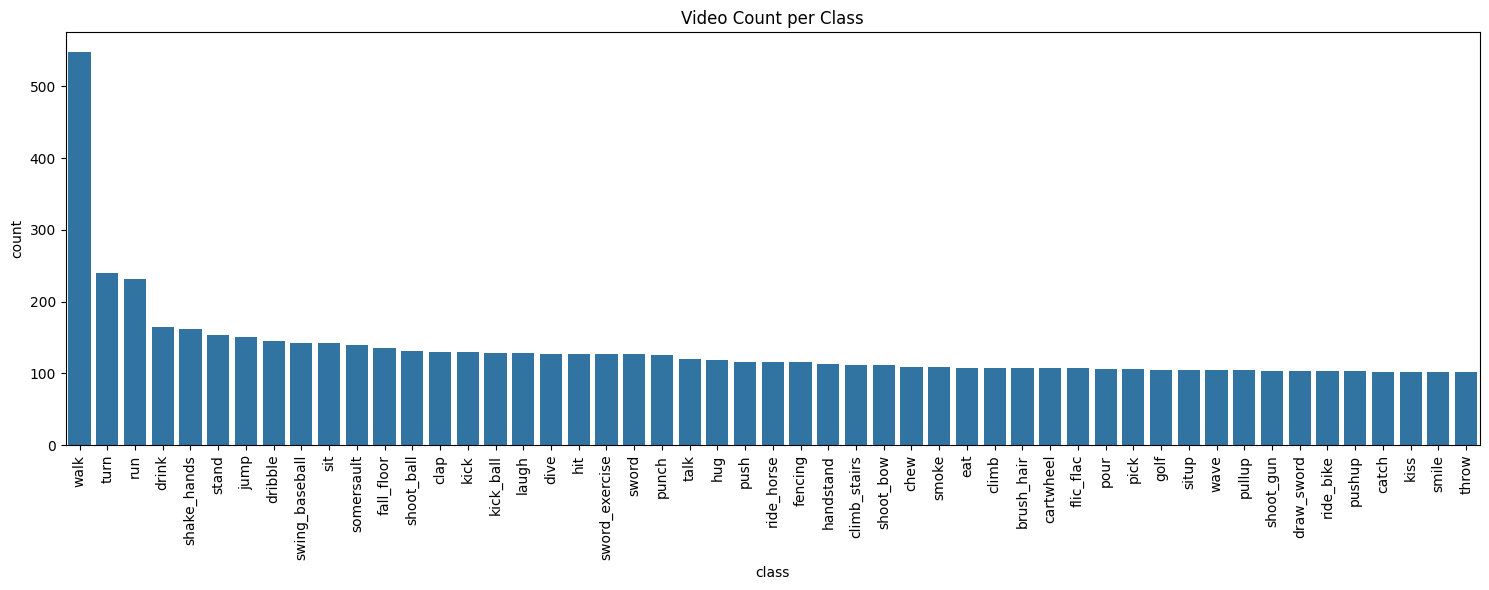

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x="class", order=df['class'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Video Count per Class")
plt.tight_layout()
plt.show()


### Total Video Duration per Class

This chart shows the **cumulative duration** (in seconds) of all `.avi` videos for each action class.

---

#### What’s Happening:
- For each class, calculates the total length of all videos using:
  - `FPS` × `Frame count`
- Plots a bar chart showing how much footage each class contributes

---

#### Why It’s Useful:
- Reveals hidden **duration imbalance** even when video counts look similar
- Helps decide on:
  - Sampling strategies
  - Frame extraction rate (This is so important and i'm going through this matter later)
  - Clip duration during training

---
Solid step before extracting frames — this ensures all classes are treated fairly.


<ipython-input-28-c3af6dd5e8aa>:8: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


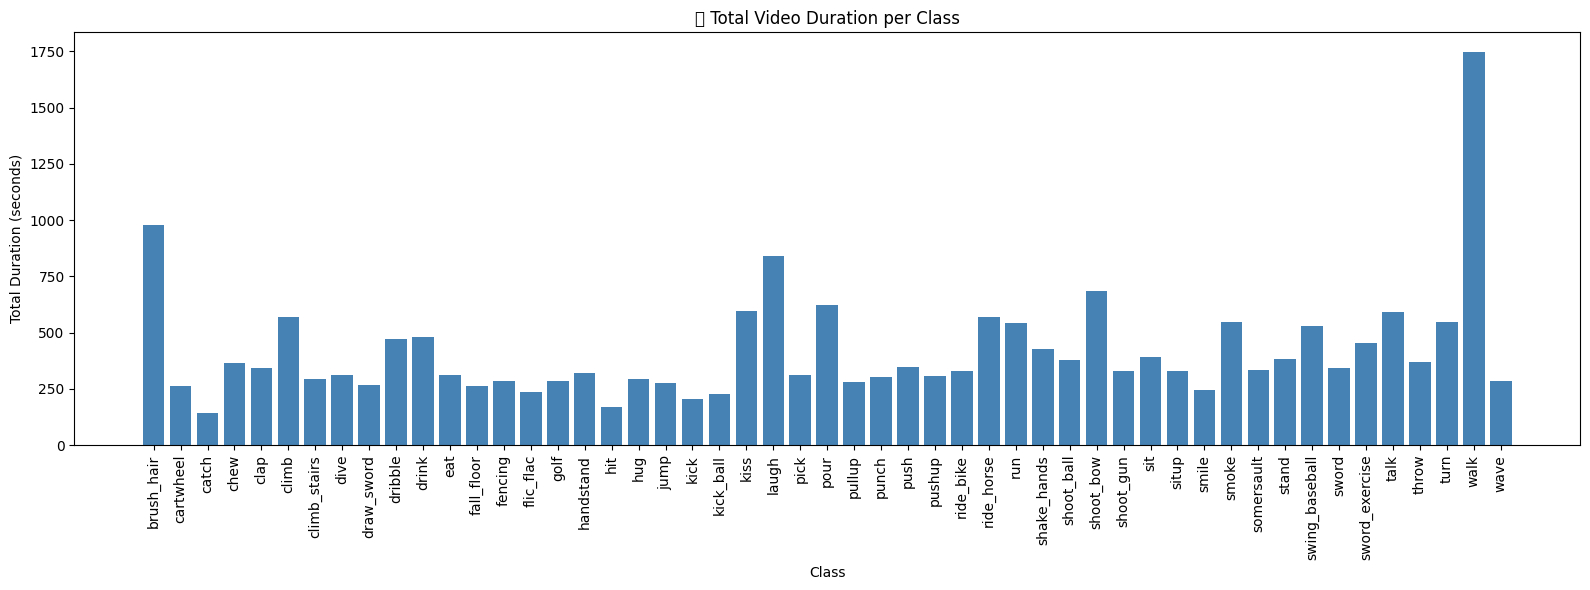

In [ ]:

class_durations = {}

for class_name in sorted(os.listdir(video_dir)):
    class_path = os.path.join(video_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    total_duration = 0
    for video_path in glob(os.path.join(class_path, "*.avi")):
        cap = cv2.VideoCapture(video_path)
        fps = cap.get(cv2.CAP_PROP_FPS)
        frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
        if fps > 0:
            total_duration += frame_count / fps
        cap.release()

    class_durations[class_name] = total_duration

#  Convert to sorted lists
classes = list(class_durations.keys())
durations = [class_durations[cls] for cls in classes]

# Plot the histogram
plt.figure(figsize=(16, 6))
plt.bar(classes, durations, color='steelblue')
plt.xticks(rotation=90)
plt.xlabel("Class")
plt.ylabel("Total Duration (seconds)")
plt.title("🎬 Total Video Duration per Class")
plt.tight_layout()
plt.show()


### Duration Distribution per Class (Binned)

This stacked bar chart shows **how video durations are distributed** across predefined time bins for each action class.

---

#### Binning Logic:
- Each `.avi` is grouped into one of four duration bins:
  - `0–1 sec`, `1–2 sec`, `2–5 sec`, `>5 sec`
- Total duration per bin is accumulated **per class**
- Output: A clear view of short vs long clips across classes

---

#### Why This Matters:
- Some classes may **have longer clips**, skewing training
- Helps fine-tune:
  - Clip length during training (e.g., 16, 32, or 64 frames)

---

#### Takeaway:
Time-based distribution adds another layer of insight —  
It’s not just how *many* videos a class has, but how *long* they are.  
Essential info before frame extraction or building a clip dataset, the frame extraction simpley help us to mitigate the slight imbalance of the data and as you can see most (kinda all of them) are longer than 1 second. 

Intrestingly what I observed is that some action like brushing hair got more than 5 seconds, this implies that some action need more time to be shown, which is kinda intuative while running can be understand by a second in a clip relying on the person gesture.


<ipython-input-30-cda4ef58dc9f>:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


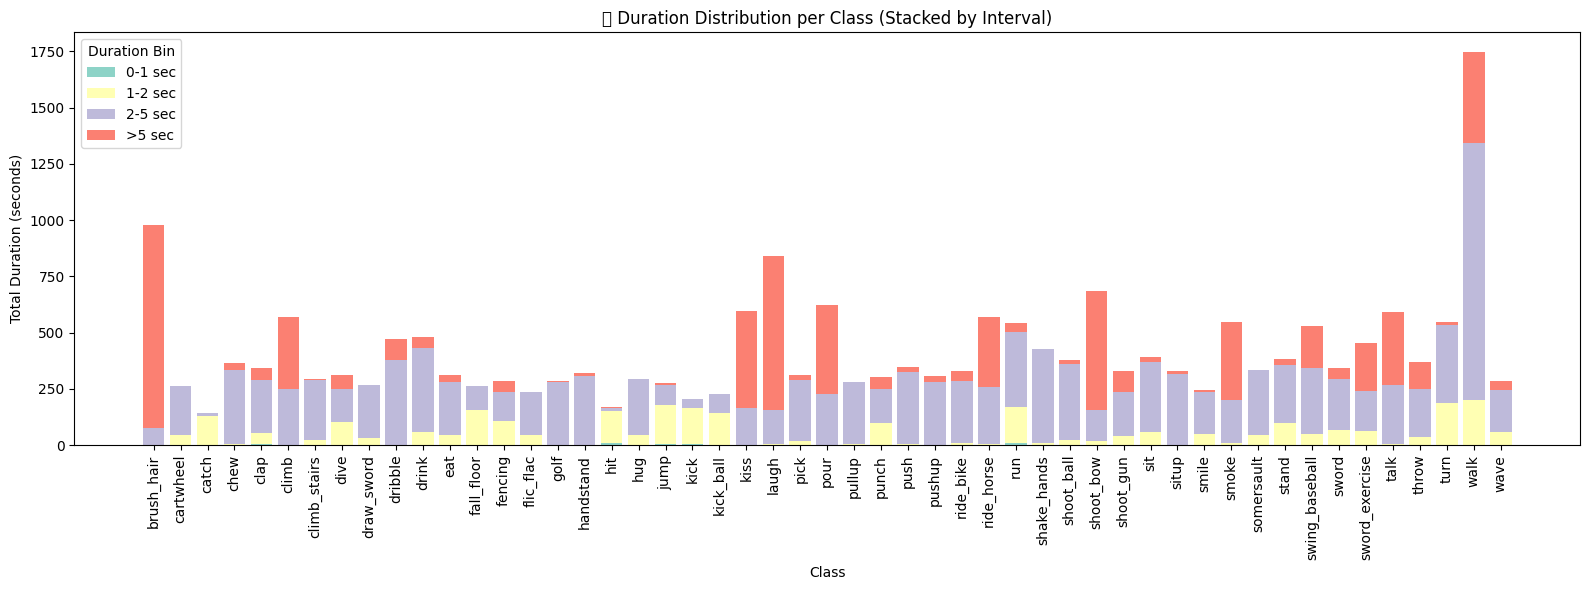

In [ ]:

# num bins
bin_edges = [0.0, 1.0, 2.0, 5.0, float("inf")]
bin_labels = ["0-1 sec", "1-2 sec", "2-5 sec", ">5 sec"]

class_bin_durations = defaultdict(lambda: defaultdict(float))

for class_name in sorted(os.listdir(video_dir)):
    class_path = os.path.join(video_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    for video_path in glob(os.path.join(class_path, "*.avi")):
        cap = cv2.VideoCapture(video_path)
        fps = cap.get(cv2.CAP_PROP_FPS)
        frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
        if fps > 0:
            duration = frame_count / fps
        else:
            duration = 0
        cap.release()

        # Assign duration to bin
        for i in range(len(bin_edges) - 1):
            if bin_edges[i] <= duration < bin_edges[i + 1]:
                class_bin_durations[class_name][bin_labels[i]] += duration
                break

# Prepare data for plotting
classes = sorted(class_bin_durations.keys())
data_by_bin = {label: [] for label in bin_labels}

for cls in classes:
    for label in bin_labels:
        data_by_bin[label].append(class_bin_durations[cls].get(label, 0.0))

# Plot stacked bar chart
plt.figure(figsize=(16, 6))
bottom = [0] * len(classes)
colors = ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072'] # i chose them randomly but guess they're winners

for label, color in zip(bin_labels, colors):
    values = data_by_bin[label]
    plt.bar(classes, values, bottom=bottom, label=label, color=color)
    bottom = [i + j for i, j in zip(bottom, values)]

plt.xticks(rotation=90)
plt.xlabel("Class")
plt.ylabel("Total Duration (seconds)")
plt.title("📊 Duration Distribution per Class (Stacked by Interval)")
plt.legend(title="Duration Bin")
plt.tight_layout()
plt.show()


### Resolution Distribution of Videos

This plot shows how many videos share the same resolution (width × height).

---

#### What’s Being Measured:
- Combines `width` and `height` into a `resolution` column (e.g., `320x240`)
- Uses a `countplot` to show frequency of each resolution

---

#### Why This Is Useful:
- Reveals if videos have **inconsistent resolutions** (which in our case it is not, they are mostly 320*240)
- Helps decide whether to:
  - Resize or crop frames to a uniform shape
  - Use padding or aspect ratio preservation


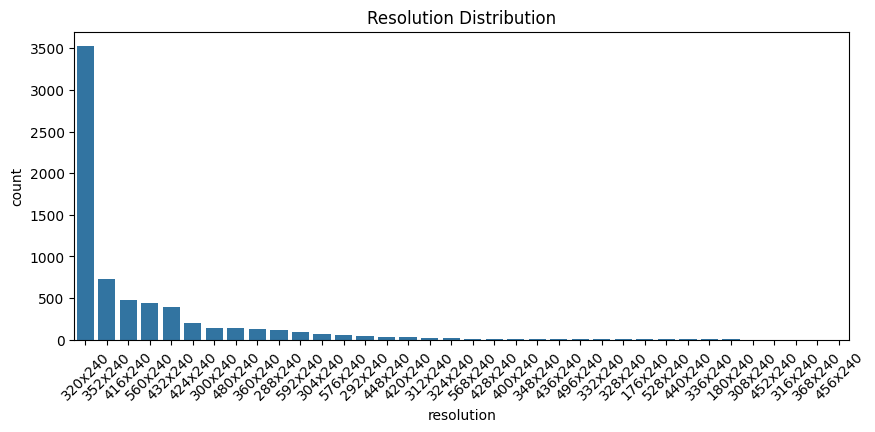

In [ ]:
df['resolution'] = df['width'].astype(str) + "x" + df['height'].astype(str)
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="resolution", order=df['resolution'].value_counts().index)
plt.title("Resolution Distribution")
plt.xticks(rotation=45)
plt.show()


### Visual Frame Samples from Random Classes

Displays a **single frame** from five randomly selected video classes — a quick visual inspection to verify video quality.

---

#### How It Works:
- Randomly picks a frame from 51 unique class names
- Extracts and shows the frame using `OpenCV` and `Matplotlib`

---

#### Why Do This?
- Helps confirm dataset consistency before preprocessing

Fast, effective, and saves headaches down the line.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127902 (\N{FILM FRAMES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


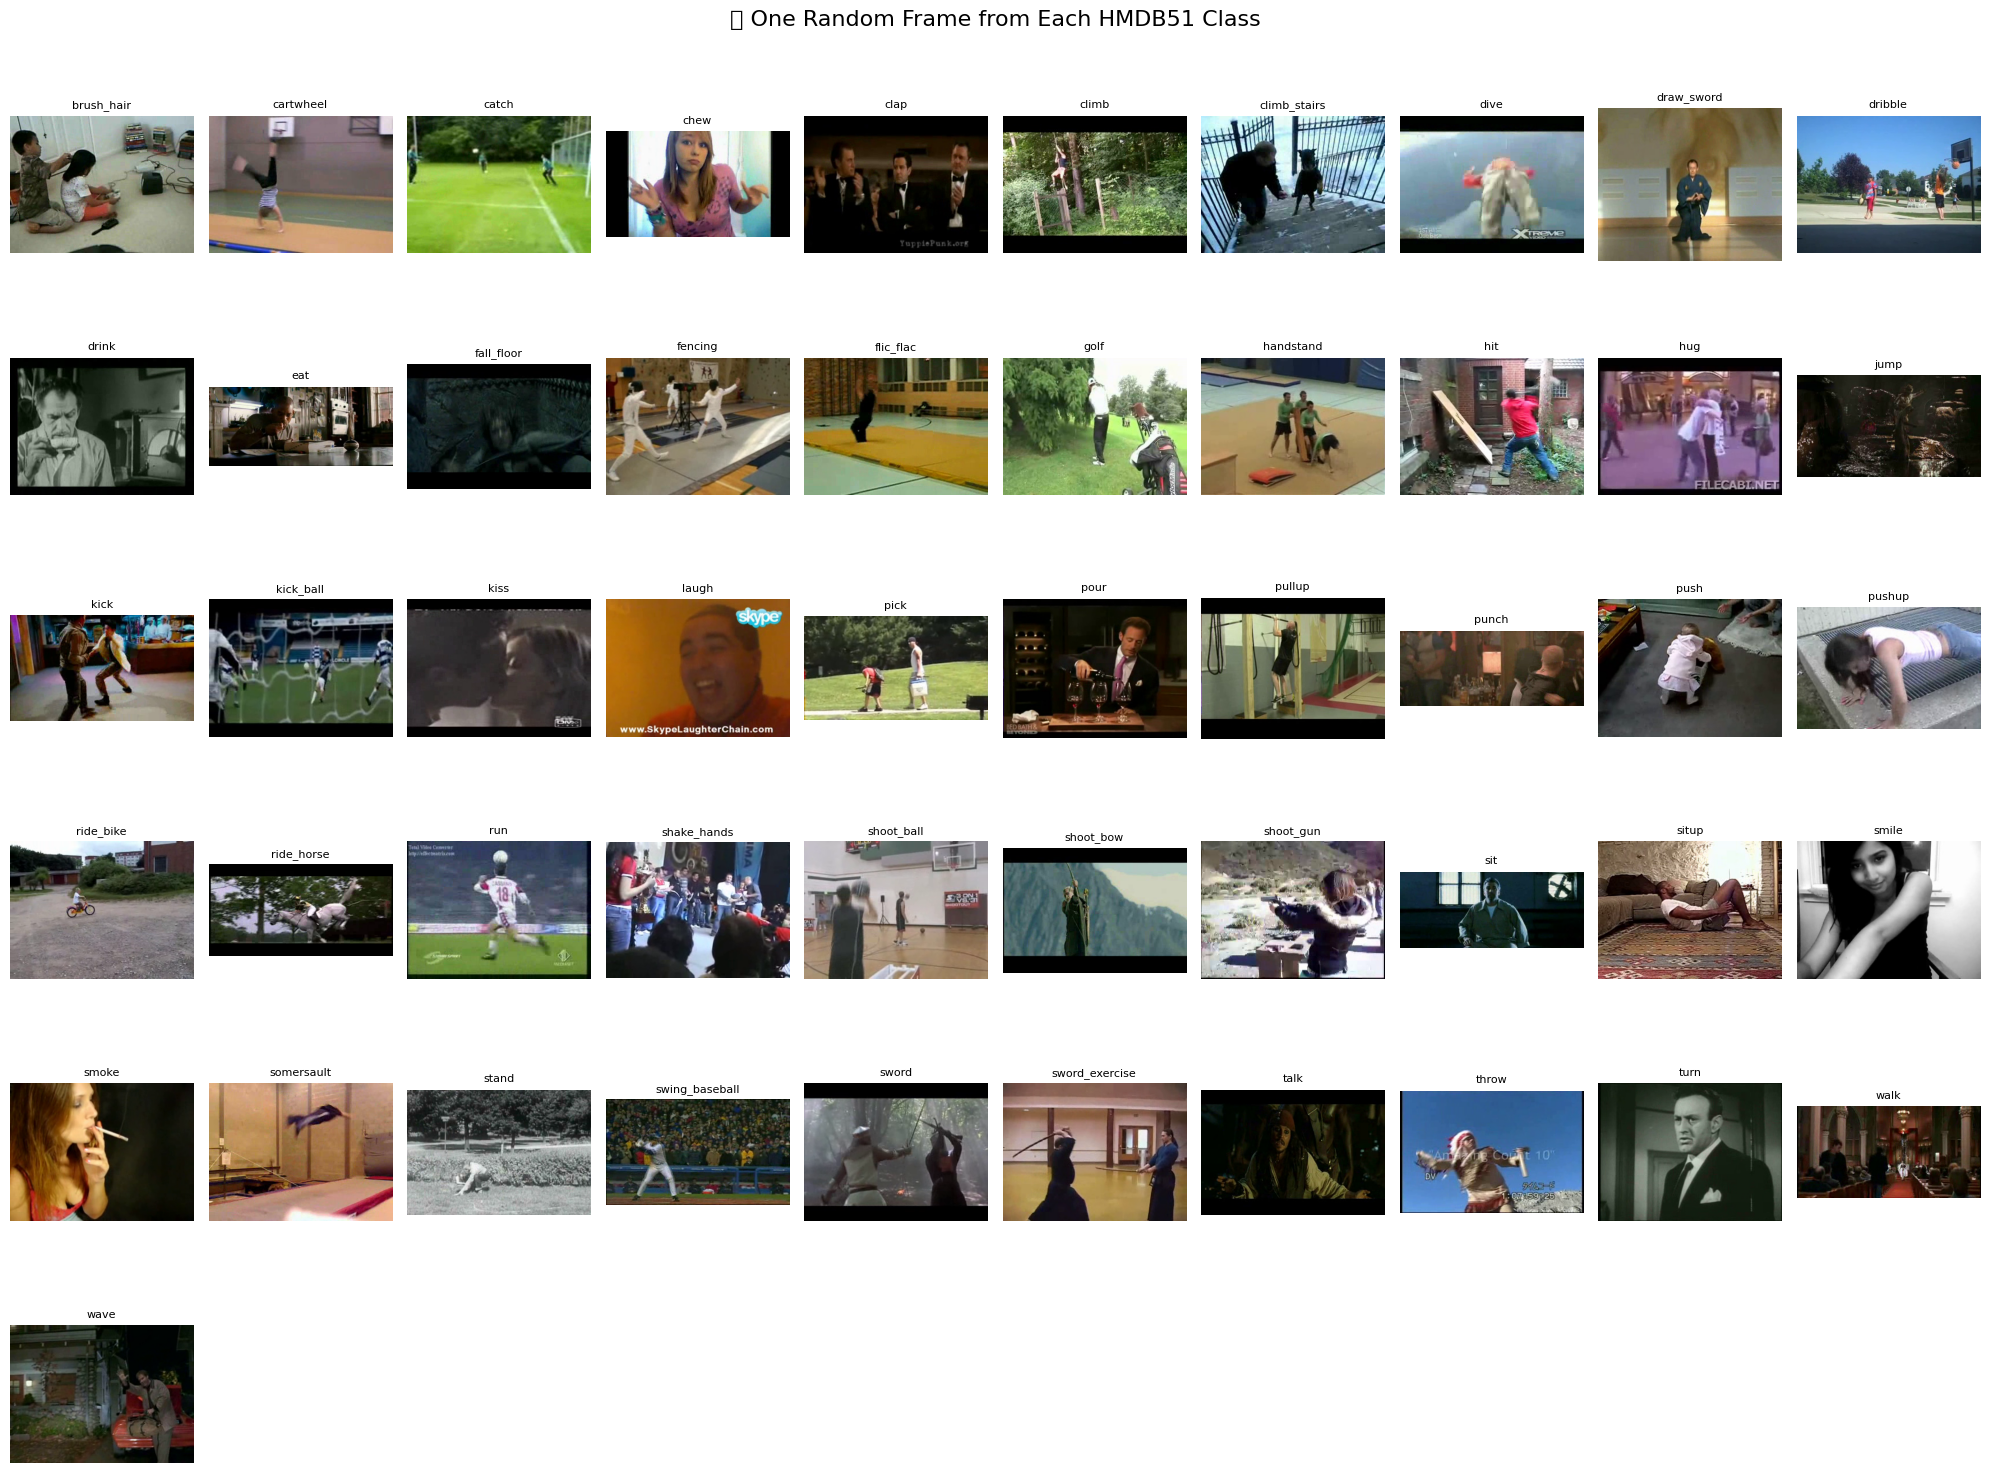

In [ ]:
rst modelrstmodelimport os
import cv2
import random
import matplotlib.pyplot as plt

video_dir = "/content/drive/MyDrive/HMDB51/HMDB51_extracted/videos"
class_names = sorted(os.listdir(video_dir))

# How many classes per row/column
cols = 10
rows = (len(class_names) + cols - 1) // cols

plt.figure(figsize=(20, 2.5 * rows))

for idx, class_name in enumerate(class_names):
    class_path = os.path.join(video_dir, class_name)
    video_files = [f for f in os.listdir(class_path) if f.endswith(".avi")]

    if not video_files:
        continue

    # Pick one random video from each calss
    video_path = os.path.join(class_path, random.choice(video_files))
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Jump to a random frame (middle frame tends to work better visually)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_count // 2)
    ret, frame = cap.read()
    cap.release()

    if not ret:
        continue

    # Convert to RGB for matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Plotting
    plt.subplot(rows, cols, idx + 1)
    plt.imshow(frame_rgb)
    plt.title(class_name, fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.suptitle("🎞️ One Random Frame from Each HMDB51 Class", fontsize=16, y=1.02)
plt.show()
